train.csv 파일로 생존자 예측 모델 생성을 위한 분석용 데이터 셋을 작성하세요.

In [885]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [886]:
filepath = '/content/train.csv'
df = pd.read_csv(filepath)

# df값 확인


In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [888]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 변수 목록
PassengerId : 각 승객의 고유

Survived : 생존 여부 (종속 변수)

Pclass : 티켓의 승선권 클래스

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항


# nan값 확인

In [889]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# nan값 처리

age쪽은 중요해보이는 변수이니 우선적으로 처리

이름에 붙어있는 Miss. Mrs. Mr. 기준으로 각각 평균값을 넣어준다

In [890]:
# Miss들의 나이 평균을 nan값에 입력
Miss_mean_Age = df[df['Name'].str.contains('Miss.')]['Age'].mean()
df.loc[df['Name'].str.contains('Miss.') & df['Age'].isnull(), 'Age']=Miss_mean_Age

In [891]:
# Mrs 나이 평균을 nan값에 입력
Miss_mean_Age = df[df['Name'].str.contains('Mrs.')]['Age'].mean()
df.loc[df['Name'].str.contains('Mrs.') & df['Age'].isnull(), 'Age']=Miss_mean_Age

In [892]:
# Mr 나이 평균을 nan값에 입력
Miss_mean_Age = df[df['Name'].str.contains('Mr.')]['Age'].mean()
df.loc[df['Name'].str.contains('Mr.') & df['Age'].isnull(), 'Age']=Miss_mean_Age

In [893]:
# 중간 점검
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              5
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [894]:
# 5명 확인
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C


In [895]:
# Master 은 Mr.과 같으므로 Mr.값의 평균 입력
Mr_mean_Age = df[df['Name'].str.contains('Mr.')]['Age'].mean()
df.loc[df['Name'].str.contains('Master.') & df['Age'].isnull(), 'Age']=Miss_mean_Age

In [896]:
# 5명 확인
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


In [897]:
#필요없는 데이터 제거
df.drop(columns=['Name','Ticket','PassengerId','Cabin','Embarked'], inplace =True)


In [898]:
# nan값 처리 확인
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         1
SibSp       0
Parch       0
Fare        0
dtype: int64


In [899]:
# Dr. 하나 남았으니 Drop
df=df.dropna()

In [900]:
#중간점검
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,21.773973,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [901]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [902]:
# Sex의 Dtype이 object임 corr을 위해서라도 int형으로 변경
# 성별을 0과 1로 변경
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

<ipython-input-902-9d36e4a1ca48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})


In [903]:
# 자기 자신을 포함한 가족의 수를 새로운 파생변수로 생성
df['Family_size'] = df['SibSp']+df['Parch']+1
df.drop(columns=['Parch'], inplace=True)
df.drop(columns=['SibSp'], inplace=True)

<ipython-input-903-fe56e52a0f9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_size'] = df['SibSp']+df['Parch']+1
<ipython-input-903-fe56e52a0f9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Parch'], inplace=True)
<ipython-input-903-fe56e52a0f9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SibSp'], inplace=True)


In [904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     890 non-null    int64  
 1   Pclass       890 non-null    int64  
 2   Sex          890 non-null    int64  
 3   Age          890 non-null    float64
 4   Fare         890 non-null    float64
 5   Family_size  890 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 48.7 KB


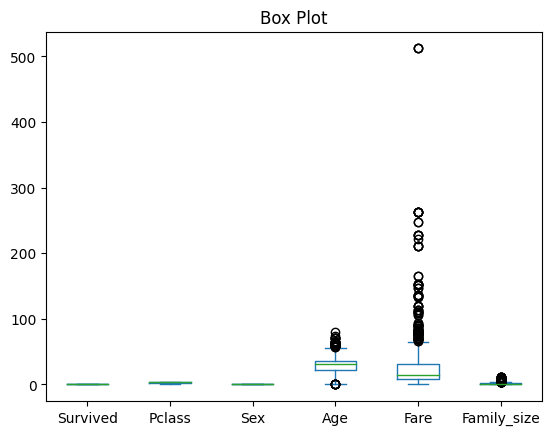

In [905]:
#시각적으로 데이터 분석
import matplotlib.pyplot as plt
df.plot.box()
plt.title('Box Plot')
plt.show()

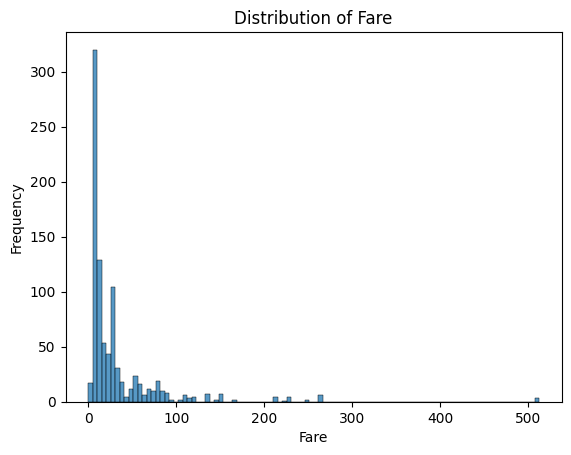

In [906]:


import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with 10 bins
sns.histplot(data=df, x="Fare", bins=100)

# Add title and labels
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Show the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

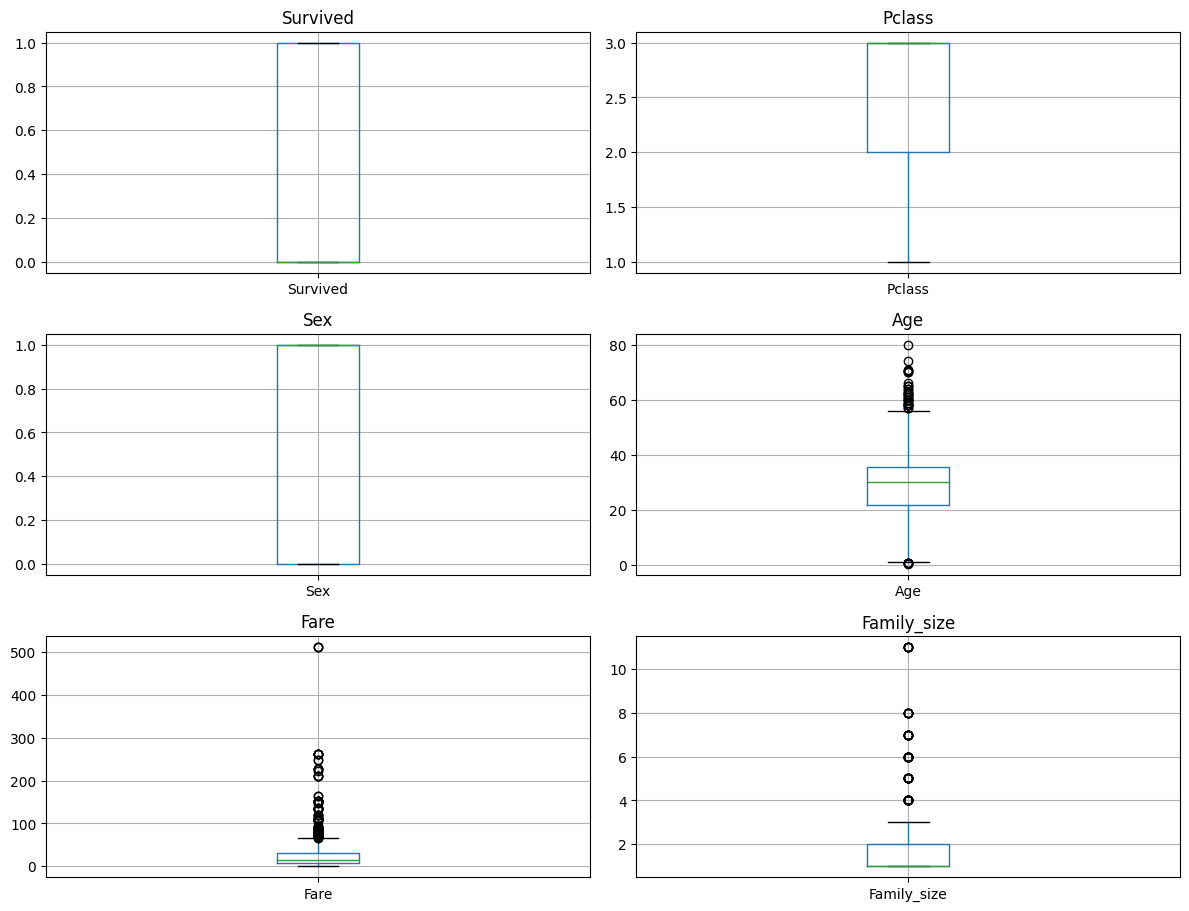

In [907]:
num_columns = len(df.columns)

#그래프의 크기 설정
plt.figure(figsize = (12,12))

# 각 열에 대한 박스플룻을 그리
for i, column in enumerate(df.columns):
    plt.subplot(4 ,2 , i + 1)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show

In [908]:
# 이상치 처리를 위한 범주형 데이터 생성

In [909]:
# 범주형은 아니지만 일단 분리
df['Pclass'] = df['Pclass'].map({1: 'first', 2: 'second',3:'third'})


<ipython-input-909-8d0fc79b5ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'] = df['Pclass'].map({1: 'first', 2: 'second',3:'third'})


In [910]:
##Fare 범주형 데이터생성
#fare_bins = [-1,16.5,100,600]
#fare_labels = ['Low','Medium','High']
#df['fare_group'] = pd.cut(df['Fare'], bins=fare_bins, labels = fare_labels)
#df.drop(columns=['Fare'], inplace=True)

In [911]:
df['fare_group']=pd.qcut(df.Fare, q=10 ,labels=['a','b','c','d','e','f','g','h','i','j'])
df.drop(columns=['Fare'], inplace=True)

<ipython-input-911-3299ba4179e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_group']=pd.qcut(df.Fare, q=10 ,labels=['a','b','c','d','e','f','g','h','i','j'])
<ipython-input-911-3299ba4179e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Fare'], inplace=True)


In [912]:
##Age 범주형 데이터 생성
#bins=[0,5,12,18,35,60,100]
#labels = ['infant','Child','Teenager','Young Adult',' Adult','Senior']
#df['age_group'] = pd.cut(df['Age'], bins=bins, labels = labels)
#df.drop(columns=['Age'], inplace=True)

In [913]:
df['age_group']=pd.qcut(df.Age, q=11 ,labels=['a','b','c','d','e','f','g','h','i','j','k'])
df.drop(columns=['Age'], inplace=True)

<ipython-input-913-ccd25a7f967f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group']=pd.qcut(df.Age, q=11 ,labels=['a','b','c','d','e','f','g','h','i','j','k'])
<ipython-input-913-ccd25a7f967f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Age'], inplace=True)


In [914]:
bins=[0,1,2,4,5,6,7,8,15]
labels = ['a','b','c','d','e','f','g','h']
df['family_group'] = pd.cut(df['Family_size'], bins=bins, labels = labels)
df.drop(columns=['Family_size'], inplace=True)

<ipython-input-914-a43c05a9f56f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_group'] = pd.cut(df['Family_size'], bins=bins, labels = labels)
<ipython-input-914-a43c05a9f56f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Family_size'], inplace=True)


In [915]:
#범주형 변수를 더미 변수로 변환할 열 목록
categorical_columns = ['age_group', 'fare_group','family_group','Pclass']

#반복문을 사용하여 범주형 변수를 더미 변수로 변환
for column in categorical_columns:
    #첫번째 카테고리는 drop_first=True로 제거
    df=pd.get_dummies(df, columns=[column])

In [916]:
df

,Survived,Sex,age_group_a,age_group_b,age_group_c,age_group_d,age_group_e,age_group_f,age_group_g,age_group_h,...,family_group_b,family_group_c,family_group_d,family_group_e,family_group_f,family_group_g,family_group_h,Pclass_first,Pclass_second,Pclass_third
0,0,1,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,1,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,1,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,1,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
887,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
888,0,0,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
889,1,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [928]:
# 타겟 변수와 피처 변수 설정
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


(712, 33) (178, 33) (712,) (178,)
Accuracy: 0.8595505617977528
